In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 999)

In [2]:
df_fanfooty_player_raw = pd.read_csv(r'inputs/fanfooty_raw.csv', low_memory=False)
df_fanfooty_player_raw.tail(3)

,Fanfooty Match ID,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground
88572,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,290675,Daniel,Lloyd,WS,6,38,54.0,23,34,52,6,9,1,1,0,0,2,0,1,Full Time,wing,%D and %s... Playing a half forward role,NaN,NaN,0.0,NaN,0.0,NaN,Midfielder,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8.0,2.0,4.0,66.0,76.0
88573,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,271015,Matthew,de Boer,WS,3,31,21.0,16,31,46,6,6,3,0,0,0,3,0,1,Full Time,tagger,%O and %M plus %s... not helped by %F... Doing...,NaN,NaN,0.0,NaN,0.0,NaN,Midfielder,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,6.0,66.0,79.0
88574,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,298111,Jeremy,Finlayson,WS,0,8,7.0,8,7,10,1,0,1,1,1,0,1,0,0,Full Time,spearhead,Starting forward,NaN,NaN,0.0,NaN,0.0,NaN,Back,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,100.0,63.0


In [3]:
df_fanfooty_player_raw.describe()

,Year,Player ID,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,null5,null6,null7,null8,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground
count,88575.000000,8.857500e+04,88575.000000,88575.000000,88407.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,88575.000000,52914.000000,44810.000000,53677.000000,47382.000000,63712.000000,59756.000000,59756.000000,59756.000000,59756.000000,59756.000000,54608.000000,44574.000000,41537.000000,0.0,45896.000000,45896.000000,45896.000000,45896.000000,45896.000000
mean,2014.618933,3.471693e+05,15.070675,70.990302,74.930684,71.961750,57.262738,76.924787,9.431047,7.238261,4.078758,2.996760,1.799142,0.853130,0.850511,0.579983,0.416811,360337.793401,44.384155,362907.476200,72.702313,20.008381,6.963317,51.376887,57.839340,3.491241,3.666681,4.044999,384556.552116,70.355298,NaN,6.446444,1.697599,2.366611,71.953046,80.216250
std,2.819225,2.295385e+05,10.005449,27.329164,29.420258,35.630331,21.886113,28.795024,4.590690,4.335270,2.549332,2.298452,6.610840,1.000375,0.982699,0.985770,0.738898,141928.610204,45.709834,126305.772704,41.915211,12.727267,6.485603,36.074946,36.337239,8.690686,8.612545,8.219463,141160.637371,28.920920,NaN,3.752352,2.257457,1.700454,14.257990,15.925197
min,2010.000000,1.000000e+00,0.000000,-6.000000,-6.000000,-10.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-170.000000,0.000000,-172.000000,0.000000,0.000000,-3.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,-44.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.503350e+05,8.000000,52.000000,55.000000,45.000000,42.000000,57.000000,6.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,278900.000000,0.000000,296900.000000,48.000000,9.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.100000,303000.000000,52.000000,NaN,4.000000,0.000000,1.000000,63.000000,77.000000
50%,2015.000000,2.808580e+05,14.000000,70.000000,73.000000,66.000000,56.000000,75.000000,9.000000,7.000000,4.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,364550.000000,42.000000,369500.000000,74.000000,18.000000,6.000000,60.800000,67.130000,0.530000,0.660000,0.920000,385000.000000,71.000000,NaN,6.000000,1.000000,2.000000,73.000000,83.000000
75%,2017.000000,2.940770e+05,20.000000,89.000000,94.000000,94.000000,72.000000,96.000000,12.000000,10.000000,6.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,452600.000000,80.000000,446700.000000,100.000000,29.000000,12.000000,78.540000,83.900000,2.160000,2.630000,3.700000,474000.000000,90.000000,NaN,8.000000,3.000000,3.000000,81.000000,88.000000
max,2019.000000,1.230242e+06,84.000000,204.000000,236.000000,258.000000,174.000000,216.000000,36.000000,35.000000,22.000000,19.000000,80.000000,9.000000,9.000000,13.000000,7.000000,942600.000000,305.000000,896000.000000,294.000000,56.000000,22.000000,156.000000,177.000000,77.430000,72.970000,74.290000,963000.000000,227.000000,NaN,32.000000,19.000000,13.000000,100.000000,100.000000


In [4]:
df_fanfooty_player_raw.columns

Index(['Fanfooty Match ID', 'Round', 'Year', 'Player ID', 'First Name',
       'Surname', 'Team', 'null', 'DT', 'SC', 'null2', 'null3', 'null4',
       'Kicks', 'Handballs', 'Marks', 'Tackles', 'Hitouts', 'Frees for',
       'Frees against', 'Goals', 'Behinds', 'Not sure', 'Tag', 'Tag Notes',
       'Tag 2', 'Tag 2 Notes', 'null5', 'null6', 'null7', 'null8', 'Position',
       'Jumper Number', 'null9', 'null10', 'null11', 'DT own %', 'SC own %',
       'AF own %', 'null12', 'AF Breakeven', 'null13', 'Contested Possessions',
       'Clearances', 'Clangers', 'Disposal efficiency', 'Time on ground'],
      dtype='object')

In [5]:
df_fanfooty_player_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88575 entries, 0 to 88574
Data columns (total 47 columns):
Fanfooty Match ID        88575 non-null object
Round                    88575 non-null object
Year                     88575 non-null int64
Player ID                88575 non-null int64
First Name               88575 non-null object
Surname                  88575 non-null object
Team                     88575 non-null object
null                     88575 non-null int64
DT                       88575 non-null int64
SC                       88407 non-null float64
null2                    88575 non-null int64
null3                    88575 non-null int64
null4                    88575 non-null int64
Kicks                    88575 non-null int64
Handballs                88575 non-null int64
Marks                    88575 non-null int64
Tackles                  88575 non-null int64
Hitouts                  88575 non-null int64
Frees for                88575 non-null int64
Frees agai

In [6]:
wanted_columns = [
    'Fanfooty Match ID', 'Round', 'Year', 'Player ID', 'First Name', 
    'Surname', 'Team', 'DT', 'SC', 'Kicks', 'Handballs', 'Marks', 
    'Tackles', 'Hitouts', 'Frees for', 'Frees against', 'Goals', 
    'Behinds', 'Tag', 'Tag Notes', 'Tag 2', 'Tag 2 Notes', 'Position', 
    'Jumper Number', 'Contested Possessions', 'Clearances', 'Clangers', 
    'Disposal efficiency', 'Time on ground'
]
df_fanfooty_player_clean = df_fanfooty_player_raw.loc[:, wanted_columns]
df_fanfooty_player_clean = df_fanfooty_player_clean.dropna(subset=['SC'])
df_fanfooty_player_clean.tail(3)

,Fanfooty Match ID,Round,Year,Player ID,First Name,Surname,Team,DT,SC,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Tag,Tag Notes,Tag 2,Tag 2 Notes,Position,Jumper Number,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground
88572,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,290675,Daniel,Lloyd,WS,38,54.0,6,9,1,1,0,0,2,0,1,wing,%D and %s... Playing a half forward role,NaN,NaN,Midfielder,38.0,8.0,2.0,4.0,66.0,76.0
88573,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,271015,Matthew,de Boer,WS,31,21.0,6,6,3,0,0,0,3,0,1,tagger,%O and %M plus %s... not helped by %F... Doing...,NaN,NaN,Midfielder,24.0,1.0,0.0,6.0,66.0,79.0
88574,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,298111,Jeremy,Finlayson,WS,8,7.0,1,0,1,1,1,0,1,0,0,spearhead,Starting forward,NaN,NaN,Back,31.0,1.0,1.0,1.0,100.0,63.0


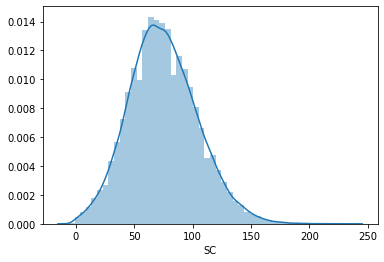

In [7]:
sns.distplot(df_fanfooty_player_clean['SC'])

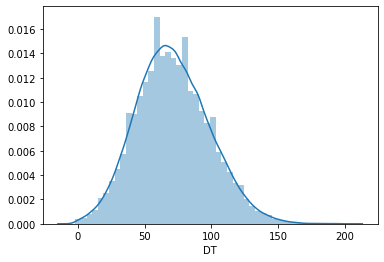

In [8]:
sns.distplot(df_fanfooty_player_clean['DT'])

In [9]:
match_id_list = []
new_df = pd.DataFrame(columns = ['Fanfooty Match ID', 'Team_1', 'Team_1_SC', 'Team_1_DT', 'Team_2', 'Team_2_SC', 'Team_2_DT'])

def move_teams_to_columns(row):
    if row['Fanfooty Match ID'] in match_id_list:
        
    


df_fantasy_summary = pd.pivot_table(df_fanfooty_player_clean, index=['Fanfooty Match ID', 'Team'], values=['SC', 'DT'], aggfunc=np.sum)
df_fantasy_summary = df_fantasy_summary.reset_index()
df_fantasy_summary
# df_fantasy_summary.to_csv(r'Outputs/df_fantasy_summary.csv')

IndentationError: expected an indented block (<ipython-input-9-703d6cf547a3>, line 10)